# Reference
 [Ch. 2 - Neural Network from scratch (Pt. 1)'](http://nbviewer.jupyter.org/github/JannesKlaas/MLiFC/blob/master/Week%201/Ch.%202%20-%20Neural%20Network%20from%20scratch%20%28Pt.%201%29.ipynb).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
%matplotlib inline

# Data
We got an input matrix $X$ and an output vector $y$ and we want to train our algorithm on making predictions for $y$.

|$X_1$|$X_2$|$X_3$|$y$|
|-|-|-|---|
|0|1|0|0|
|1|0|0|1|
|1|1|1|1|
|0|1|1|0|

In [2]:
X = np.array([[0,1,0],
              [1,0,0],
              [1,1,1],
              [0,1,1]])

y = np.array([[0,1,1,0]]).T

# Logistic Regression
In neural networks, the input layer is denoted as $A_0$, the first layer as $A_1$ and so on. Since the input layer activations are just the input, we find that:

$$A_0 = X$$

In the graphical content of this course I will denote specific features of a layer with squared brakets, like in  python array indexing. $X_1$ therfore becomes ```A0[0] ```

As you can see in the image above, our neural net will consist of only one input layer and one output layer. The first the input features are multiplied with the weights $w$ and the weighted features then get summed up, together with the bias b. This is exactly what happens in linear regression.

In linear regression, the bias $b$ is usually denoted as $\beta_0$ while the weights are named $\beta_1, \beta_2, \beta_3...$ For convenience we are just calling $\beta_0$ $b$ and group all other weights into the weight vector $w$. $w$ and $b$ are called the parameters of the neural network. 

The outcome of our linear regression gets then passed into a non linear activation function, in our case the sigmoid function. This is the same as what happens in logistic regression. 

$$ z_1 = A_0.W_1 + b$$

In [3]:
A0 = X

# Sigmoid Activation Function

If we had a linear activation function, the output would simply be a weighted sum of our input features. 

Through non-linear activation functions we can model much more complex functions. In fact, it has been shown that neural nets can model _any_ function, as long as we make them big enough. 

Sigmoid function has the formula:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$


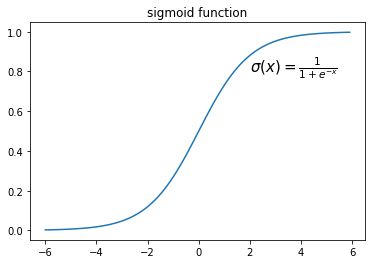

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-6., 6., 0.1)
sig = sigmoid(x)
plt.title("sigmoid function")
plt.text(2, 0.8, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=15)
plt.plot(x, sig)
plt.show()

# Initializing Weights

Before we can work with the weights, we have to initialize them.

This creates a 3 by 1 weight matrix, mapping our three input features to our one output. It is important to initialize the weights randomly and not just set them all to zero for the sake of symmetry breaking. 

If all the weights where the same, then they would never be different from each other, and our neural net could not model any complex functions.

In [5]:
# initializes weights with random number between -1 and 1
W_1 = 2 * np.random.random((3, 1)) - 1
# set bias to 0
b_1 = 0

# Forward Propagation

With all the elements in place, we can now obtain predictions from our network with a forward pass.

1. We do a linear step:
$$ z_1 = A_0.W_1 + b$$
2. We pass the linear product through the activation function
$$A_1 = \sigma(z_1)$$

We got an input matrix $X$ and an output vector $y$ and we want to train our algorithm on making predictions for $y$.

|$X_1$|$X_2$|$X_3$|$y$|$\hat{y}$|
|-|-|-|-|-|
|0|1|0|0|0.60841366|
|1|0|0|1|0.45860596|
|1|1|1|1|0.3262757 |
|0|1|1|0|0.36375058|

In [6]:
z1 = np.dot(A0, W_1) + b_1
A1 = sigmoid(z1)
print(A1)

[[0.60841366]
 [0.45860596]
 [0.3262757 ]
 [0.36375058]]


## Measuring Losses
 
That does not look like $y$ at all! That is just random numbers! We now have to modify the weights so that we arrive at better predictions.

In order to arrive at better predictions, we first have to quantify how badly we did. In classification the metric used is the cross-entropy loss, sometimes also called logistic loss or log loss. It is calculated as follows:
 
 $$L(w) = -\frac{1}{m} \sum_{i=1}^m [y_i * \log \hat y_i  +  (1-y_i)*\log(1-\hat y_i)]$$
 
 Let's go through this step by step.
 
 1. $L(w)$ is the loss function given the weights $w$ that where used to obtain the prediction $\hat y_i$
 2. $-\frac{1}{m} \sum_{i=0}^m$ The loss over a batch of m examples is the average loss of all examples. We have factored a - out of the sum and moved it in front of the equation.
 3. $y_i * \log \hat y_i$ This part of the loss only comes into play if the true value, $y_i$ is 1. If $y_i$ is 1, we want $\hat y_i$ to be as close to 1 as possible, to achieve a low loss.
 4. $(1-y_i)*\log(1-\hat y_i)$ This part of the loss comes into play if $y_i$ is 0. If so, we want $\hat y_i$ to be close to 0 as well.
 
 Consider the following example: We have only one sample so, 
 $m = 1$, the true value $y_i = 1$ and the the prediction $\hat y_i = 0.01$. $\hat y_i$ can be interpreted as the probability that $y_i = 1$ given $X_i$, or $P(y_i = 1 | X_i)$ in math terms. It will never be zero since the probability of $y_i = 1$ will never be zero, only very small. Here, our algorithm has given $y_i = 1$ only a 1% chance. In the case above our loss can be calculated as: 
 
 $$L(w) = -\frac{1}{1} \sum_{i=0}^1 [1 * \log (0.01)  +  (1-1)*\log(1-0)]$$
  $$L(w) = -[-4.6051  +  0]$$
  $$L(w) = 4.6051$$
  
  This is quite a high loss, let's see what would have happened if $\hat y_i = 0.99$, meaning the algorithm would have given $y_i = 1$ a 99% chance.
  
  $$L(w) = -\frac{1}{1} \sum_{i=0}^1 [1 * \log (0.99)  +  (1-1)*\log(1-0.99)]$$
   $$L(w) = -[-0.01  +  0]$$
   $$L(w) = 0.01$$

In [7]:
def logistic_loss(y, y_hat):
    m = y.shape[0]
    loss = -1/m * np.sum(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
    return loss

# Backward Propagation
Before we can start updating our weights, we have to calculate the derivative. We want the derivative of the total loss $L(w)$ with respect to the weight vector $w$.

In [8]:
def logistic_loss_derivative(y, y_hat):
    return (y_hat - y)

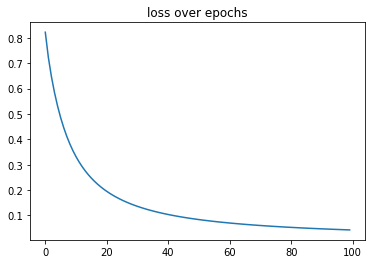

In [9]:
m = y.shape[0]
epochs = 100
learning_rate = 1
losses = []
for i in range(epochs):
    z1 = np.dot(X, W_1) + b_1
    A1 = sigmoid(z1)
    loss = logistic_loss(y=y,y_hat=A1)
    losses.append(loss)
    loss_derivative = logistic_loss_derivative(y=y, y_hat=A1)
    dW1 = 1/m * np.dot(X.T, loss_derivative)
    db1 = 1/m * np.sum(loss_derivative, axis=0, keepdims=True)
    W_1 -= learning_rate * dW1
    b_1 -= learning_rate * db1

plt.title("loss over epochs")
plt.plot(losses)
plt.show()